In [173]:
# netcdf/numpy/xray/stats
import xarray as xr

from sublimpy import variables
from sublimpy import utils
from sublimpy import tidy

import pandas as pd
import datetime as dt
import pytz

import matplotlib.pyplot as plt

import altair as alt
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

# Inputs

In [86]:
sos_download_dir='/data2/elilouis/sublimationofsnow/sosnoqc'
DATE_FORMAT_STR = '%Y%m%d'
# start_date = '20221201'
# end_date = dt.datetime.strftime(dt.date.today() - dt.timedelta(days=1), DATE_FORMAT_STR)
start_date = '20221130'
end_date = '20230517'
PLANAR_FIT = False




datelist = pd.date_range(
    dt.datetime.strptime(start_date, DATE_FORMAT_STR),
    dt.datetime.strptime(end_date, DATE_FORMAT_STR),
    freq='d'
).strftime(DATE_FORMAT_STR).tolist()

VARIABLE_NAMES = [
    # Sonic Anemometer Data for 4 towers
    'tc_1m_uw',     'spd_1m_uw',     'dir_1m_uw',     'u_1m_uw',   'v_1m_uw',   'w_1m_uw',   'u_u__1m_uw',    'v_v__1m_uw',    'w_w__1m_uw',    
        'u_w__1m_uw',    'v_w__1m_uw',  'u_tc__1m_uw',  'v_tc__1m_uw',   'u_h2o__1m_uw',  'v_h2o__1m_uw',   'w_tc__1m_uw',   'w_h2o__1m_uw',
    'tc_3m_uw',     'spd_3m_uw',     'dir_3m_uw',     'u_3m_uw',   'v_3m_uw',   'w_3m_uw',   'u_u__3m_uw',    'v_v__3m_uw',    'w_w__3m_uw',    
        'u_w__3m_uw',    'v_w__3m_uw',  'u_tc__3m_uw',  'v_tc__3m_uw',   'u_h2o__3m_uw',  'v_h2o__3m_uw',   'w_tc__3m_uw',   'w_h2o__3m_uw',
    'tc_10m_uw',    'spd_10m_uw',    'dir_10m_uw',    'u_10m_uw',  'v_10m_uw',  'w_10m_uw',  'u_u__10m_uw',   'v_v__10m_uw',   'w_w__10m_uw',   
        'u_w__10m_uw',   'v_w__10m_uw', 'u_tc__10m_uw', 'v_tc__10m_uw',  'u_h2o__10m_uw', 'v_h2o__10m_uw',  'w_tc__10m_uw',  'w_h2o__10m_uw',

    'tc_1m_ue',     'spd_1m_ue',     'dir_1m_ue',     'u_1m_ue',   'v_1m_ue',   'w_1m_ue',   'u_u__1m_ue',    'v_v__1m_ue',    'w_w__1m_ue',    
        'u_w__1m_ue',    'v_w__1m_ue',  'u_tc__1m_ue',  'v_tc__1m_ue',   'u_h2o__1m_ue',  'v_h2o__1m_ue',   'w_tc__1m_ue',   'w_h2o__1m_ue',
    'tc_3m_ue',     'spd_3m_ue',     'dir_3m_ue',     'u_3m_ue',   'v_3m_ue',   'w_3m_ue',   'u_u__3m_ue',    'v_v__3m_ue',    'w_w__3m_ue',    
        'u_w__3m_ue',    'v_w__3m_ue',  'u_tc__3m_ue',  'v_tc__3m_ue',   'u_h2o__3m_ue',  'v_h2o__3m_ue',   'w_tc__3m_ue',   'w_h2o__3m_ue',
    'tc_10m_ue',    'spd_10m_ue',    'dir_10m_ue',    'u_10m_ue',  'v_10m_ue',  'w_10m_ue',  'u_u__10m_ue',   'v_v__10m_ue',   'w_w__10m_ue',   
        'u_w__10m_ue',   'v_w__10m_ue', 'u_tc__10m_ue', 'v_tc__10m_ue',  'u_h2o__10m_ue', 'v_h2o__10m_ue',  'w_tc__10m_ue',  'w_h2o__10m_ue',

    'tc_1m_d',      'spd_1m_d',     'dir_1m_d',     'u_1m_d',   'v_1m_d',   'w_1m_d',   'u_u__1m_d',    'v_v__1m_d',    'w_w__1m_d',    
        'u_w__1m_d',    'v_w__1m_d',  'u_tc__1m_d',  'v_tc__1m_d',   'u_h2o__1m_d',  'v_h2o__1m_d',   'w_tc__1m_d',   'w_h2o__1m_d',
    'tc_3m_d',      'spd_3m_d',     'dir_3m_d',     'u_3m_d',   'v_3m_d',   'w_3m_d',   'u_u__3m_d',    'v_v__3m_d',    'w_w__3m_d',    
        'u_w__3m_d',    'v_w__3m_d',  'u_tc__3m_d',  'v_tc__3m_d',   'u_h2o__3m_d',  'v_h2o__3m_d',   'w_tc__3m_d',   'w_h2o__3m_d',
    'tc_10m_d',     'spd_10m_d',    'dir_10m_d',    'u_10m_d',  'v_10m_d',  'w_10m_d',  'u_u__10m_d',   'v_v__10m_d',   'w_w__10m_d',   
        'u_w__10m_d',   'v_w__10m_d', 'u_tc__10m_d', 'v_tc__10m_d',  'u_h2o__10m_d', 'v_h2o__10m_d',  'w_tc__10m_d',  'w_h2o__10m_d',

    'tc_2m_c',  'spd_2m_c',     'dir_2m_c',     'u_2m_c',   'v_2m_c',   'w_2m_c',   'u_u__2m_c',    'v_v__2m_c',    'w_w__2m_c',    
        'u_w__2m_c',    'v_w__2m_c',  'u_tc__2m_c',  'v_tc__2m_c',   'u_h2o__2m_c',  'v_h2o__2m_c',   'w_tc__2m_c',   'w_h2o__2m_c',
    'tc_3m_c',  'spd_3m_c',     'dir_3m_c',     'u_3m_c',   'v_3m_c',   'w_3m_c',   'u_u__3m_c',    'v_v__3m_c',    'w_w__3m_c',    
        'u_w__3m_c',    'v_w__3m_c',  'u_tc__3m_c',  'v_tc__3m_c',   'u_h2o__3m_c',  'v_h2o__3m_c',   'w_tc__3m_c',   'w_h2o__3m_c',
    'tc_5m_c',  'spd_5m_c',     'dir_5m_c',     'u_5m_c',   'v_5m_c',   'w_5m_c',   'u_u__5m_c',    'v_v__5m_c',    'w_w__5m_c',    
        'u_w__5m_c',    'v_w__5m_c',  'u_tc__5m_c',  'v_tc__5m_c',   'u_h2o__5m_c',  'v_h2o__5m_c',   'w_tc__5m_c',   'w_h2o__5m_c',
    'tc_10m_c', 'spd_10m_c',    'dir_10m_c',    'u_10m_c',  'v_10m_c',  'w_10m_c',  'u_u__10m_c',   'v_v__10m_c',   'w_w__10m_c',   
        'u_w__10m_c',   'v_w__10m_c', 'u_tc__10m_c', 'v_tc__10m_c',  'u_h2o__10m_c', 'v_h2o__10m_c',  'w_tc__10m_c',  'w_h2o__10m_c',
    'tc_15m_c', 'spd_15m_c',    'dir_15m_c',    'u_15m_c',  'v_15m_c',  'w_15m_c',  'u_u__15m_c',   'v_v__15m_c',   'w_w__15m_c',   
        'u_w__15m_c',   'v_w__15m_c', 'u_tc__15m_c', 'v_tc__15m_c',  'u_h2o__15m_c', 'v_h2o__15m_c',  'w_tc__15m_c',  'w_h2o__15m_c',
    'tc_20m_c', 'spd_20m_c',    'dir_20m_c',    'u_20m_c',  'v_20m_c',  'w_20m_c',  'u_u__20m_c',   'v_v__20m_c',   'w_w__20m_c',   
        'u_w__20m_c',   'v_w__20m_c', 'u_tc__20m_c', 'v_tc__20m_c',  'u_h2o__20m_c', 'v_h2o__20m_c',  'w_tc__20m_c',  'w_h2o__20m_c',

    
    # Temperature & Relative Humidity Array 
    'T_2m_c', 'T_3m_c', 'T_4m_c', 'T_5m_c', 'T_6m_c', 'T_7m_c', 'T_8m_c', 'T_9m_c', 'T_10m_c',
    'T_11m_c', 'T_12m_c', 'T_13m_c', 'T_14m_c', 'T_15m_c', 'T_16m_c', 'T_17m_c', 'T_18m_c', 'T_19m_c', 'T_20m_c',

    'RH_2m_c', 'RH_3m_c', 'RH_4m_c', 'RH_5m_c', 'RH_6m_c', 'RH_7m_c', 'RH_8m_c', 'RH_9m_c', 'RH_10m_c',
    'RH_11m_c','RH_12m_c','RH_13m_c','RH_14m_c','RH_15m_c','RH_16m_c','RH_17m_c','RH_18m_c','RH_19m_c','RH_20m_c',

    # Pressure Sensors
    'P_20m_c',
    'P_10m_c', 'P_10m_d', 'P_10m_uw', 'P_10m_ue',

    # Blowing snow/FlowCapt Sensors
    'SF_avg_1m_ue', 'SF_avg_2m_ue',

    # Apogee sensors
    "Vtherm_c", "Vtherm_d", "Vtherm_ue", "Vtherm_uw", 
    "Vpile_c", "Vpile_d", "Vpile_ue", "Vpile_uw",
    "IDir_c", "IDir_d", "IDir_ue", "IDir_uw",

    # Snow-level temperature arrays (towers D and UW)
    'Tsnow_0_4m_d', 'Tsnow_0_5m_d', 'Tsnow_0_6m_d', 'Tsnow_0_7m_d', 'Tsnow_0_8m_d', 'Tsnow_0_9m_d', 'Tsnow_1_0m_d', 'Tsnow_1_1m_d', 'Tsnow_1_2m_d', 'Tsnow_1_3m_d', 'Tsnow_1_4m_d', 'Tsnow_1_5m_d',
    'Tsnow_0_4m_uw', 'Tsnow_0_5m_uw', 'Tsnow_0_6m_uw', 'Tsnow_0_7m_uw', 'Tsnow_0_8m_uw', 'Tsnow_0_9m_uw', 'Tsnow_1_0m_uw', 'Tsnow_1_1m_uw', 'Tsnow_1_2m_uw', 'Tsnow_1_3m_uw', 'Tsnow_1_4m_uw', 'Tsnow_1_5m_uw',
    
    # Downward Facing Longwave Radiometer (tower D) - for measuring snow surface temperature
    'Rpile_out_9m_d',
    'Tcase_out_9m_d',
    
    # Upward Facing Longwave Radiometer (tower D)
    'Rpile_in_9m_d',
    'Tcase_in_9m_d',
    
    # Upward facing shortwave radiometer (tower D) - for measuring incoming solar radiation!
    'Rsw_in_9m_d',
    'Rsw_out_9m_d',

    # Snow Pillow SWE
    'SWE_p1_c', 'SWE_p2_c', 'SWE_p3_c', 'SWE_p4_c',

    # Soil Moisture
    'Qsoil_d',
]

# Download and Clean SoS data

In [87]:
sos_ds = utils.download_sos_data(start_date, end_date, VARIABLE_NAMES, sos_download_dir, cache=True, planar_fit=False)

Caching...skipping download for 20221130
Caching...skipping download for 20221201


Caching...skipping download for 20221202
Caching...skipping download for 20221203
Caching...skipping download for 20221204
Caching...skipping download for 20221205
Caching...skipping download for 20221206
Caching...skipping download for 20221207
Caching...skipping download for 20221208
Caching...skipping download for 20221209
Caching...skipping download for 20221210
Caching...skipping download for 20221211
Caching...skipping download for 20221212
Caching...skipping download for 20221213
Caching...skipping download for 20221214
Caching...skipping download for 20221215
Caching...skipping download for 20221216
Caching...skipping download for 20221217
Caching...skipping download for 20221218
Caching...skipping download for 20221219
Caching...skipping download for 20221220
Caching...skipping download for 20221221
Caching...skipping download for 20221222
Caching...skipping download for 20221223
Caching...skipping download for 20221224
Caching...skipping download for 20221225
Caching...skippi

In [88]:
example = xr.open_dataset(os.path.join(sos_download_dir, "isfs_20230513.nc"))
example2 = xr.open_dataset(os.path.join(sos_download_dir, "isfs_20230511.nc"))

# Add Variables

In [89]:
sos_ds = variables.add_longwave_radiation(sos_ds)
sos_ds = variables.add_surface_temps(sos_ds)
sos_ds = variables.add_potential_virtual_temperatures(sos_ds)
sos_ds = variables.add_surface_potential_virtual_temperatures(sos_ds)
sos_ds = variables.add_tke(sos_ds)
sos_ds = variables.add_gradients_and_ri(sos_ds)
sos_ds = variables.add_obukhov_length(sos_ds)

(-10.0, 10.0)

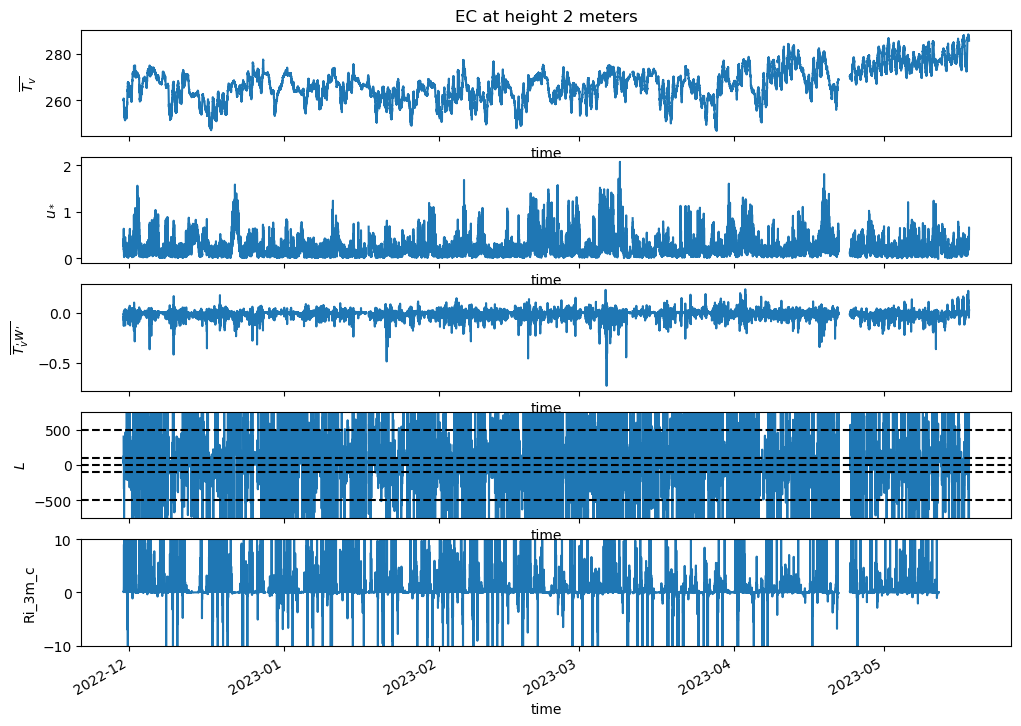

In [90]:
i = 2
fig, axes = plt.subplots(5, 1, figsize=(12,8), sharex=True)

(sos_ds[f'Tpotvirtual_{i}m_c']+273.15)

(sos_ds[f'Tvirtual_{i}m_c'] + 273.15).plot(ax = axes[0])
axes[0].set_ylabel(r'$\overline{T_v}$')

sos_ds[f'u*_{i}m_c'].plot(ax = axes[1])
axes[1].set_ylabel(r'$u_*$')

sos_ds[f'w_tc__{i}m_c'].plot(ax = axes[2])
axes[2].set_ylabel(r'$\overline{T_v^, w^,}$')

sos_ds[f'L_{i}m_c'].plot(ax = axes[3])
axes[3].axhline(-500, color='k', linestyle='--')
axes[3].axhline(-100, color='k', linestyle='--')
axes[3].axhline(0, color='k', linestyle='--')
axes[3].axhline(100, color='k', linestyle='--')
axes[3].axhline(500, color='k', linestyle='--')
axes[3].set_ylim(-750,750)
axes[3].set_ylabel(r'$L$')

axes[0].set_title(f"EC at height {i} meters")

sos_ds[f'Ri_3m_c'].plot(ax = axes[4])
axes[4].set_ylim(-10,10)

# Get Tidy Dataset

In [91]:
tidy_df = tidy.get_tidy_dataset(sos_ds, list(sos_ds.data_vars))

In [92]:
tidy_df = utils.modify_df_timezone(tidy_df, pytz.UTC, pytz.timezone('US/Mountain'))

Which variables did not get a "measurement" name assigned?

In [93]:
variables_with_no_measurement = tidy_df[tidy_df.measurement.apply(lambda x: x is None)].variable.unique()
variables_with_no_measurement

array(['Tcase_out_9m_d', 'Rpile_in_9m_d', 'Tcase_in_9m_d',
       'Rpile_out_9m_d'], dtype=object)

# Calculate 30 Minute averages

In [94]:
tidy_df_30Min = pd.DataFrame(
    tidy_df.set_index('time').groupby(
        ['measurement', 'variable', 'height',  'tower']
    )['value'].resample('30Min').mean()
).reset_index()

# Calculate turbulent fluxes with MOST

In [95]:
import pint_xarray
from metpy.calc import specific_humidity_from_mixing_ratio
from metpy.units import units

In [96]:
# EXTRACT VARIABLES
VARIABLES = [
    ## Input Variables
    'spd_3m_c',
    'Tpot_3m_c',
    'Tsurfpot_rad_c',
    'airdensity_3m_c',
    'mixingratio_3m_c',
    'Tsurfmixingratio_rad_c',
    'T_3m_c',
    ## Measurement Variables
    'w_h2o__3m_c',
    'w_tc__3m_c',
    'u*_3m_c',
    'Ri_3m_c',
    ## Input Variables for Turbpy
    'Tsurf_rad_d',
    'P_10m_c',
]
print([ v for v in tidy_df_30Min.variable.unique() if v in VARIABLES ])

# CREATE DATAFRAME
variables_df = tidy_df_30Min[tidy_df_30Min.variable.isin(VARIABLES)].pivot_table(
    values = 'value',
    index = 'time',
    columns='variable'
).reset_index()

# MAKE CONVERSIONS
# convert from ˚C to K
variables_df['T_3m_c'] = variables_df['T_3m_c'] + 273.15
variables_df['Tpot_3m_c'] = variables_df['Tpot_3m_c'] + 273.15
variables_df['Tsurfpot_rad_c'] = variables_df['Tsurfpot_rad_c'] + 273.15
variables_df['Tsurf_rad_d'] = variables_df['Tsurf_rad_d']  + 273.15
# comes in units of g/g
variables_df['specifichumidity_3m_c'] = specific_humidity_from_mixing_ratio(
    xr.DataArray(variables_df['mixingratio_3m_c'])*units('g/g')
).pint.to('g/kg').values

# comes in units of g/g
# our solution requires it in units of g/kg
variables_df['specifichumidity_surface_c'] = specific_humidity_from_mixing_ratio(
    xr.DataArray(variables_df['Tsurfmixingratio_rad_c'])*units('g/g')
).pint.to('g/kg').values

# CREATE MEASUREMENT HEIGHT VARIABLES
variables_df['measurement_height'] = 3
variables_df['measurement_height'] = 3
variables_df['measurement_height'] = 3


['airdensity_3m_c', 'Tsurfmixingratio_rad_c', 'mixingratio_3m_c', 'Tpot_3m_c', 'P_10m_c', 'Ri_3m_c', 'u*_3m_c', 'Tsurfpot_rad_c', 'Tsurf_rad_d', 'T_3m_c', 'w_h2o__3m_c', 'w_tc__3m_c', 'spd_3m_c']


## My Solution

In [97]:
variables_df[['spd_3m_c',
'Tpot_3m_c',
'Tsurfpot_rad_c',
'airdensity_3m_c',
'specifichumidity_3m_c',
'specifichumidity_surface_c',
'T_3m_c',
'measurement_height']]

variable,spd_3m_c,Tpot_3m_c,Tsurfpot_rad_c,airdensity_3m_c,specifichumidity_3m_c,specifichumidity_surface_c,T_3m_c,measurement_height
0,3.323426,286.680558,283.042946,0.954360,1.306591,1.534057,260.352508,3
1,4.556745,286.370790,279.902878,0.955830,0.994843,1.205349,260.099139,3
2,3.731591,285.938493,278.574014,0.957856,0.959287,1.091131,259.767198,3
3,1.838974,284.095353,275.945835,0.964693,1.017955,0.891944,258.161803,3
4,1.354227,282.565278,274.166145,0.970349,1.057715,0.775037,256.820924,3
...,...,...,...,...,...,...,...,...
7978,4.693956,315.077892,NaN,0.873777,4.241446,NaN,287.060910,3
7979,4.374811,314.660793,NaN,0.874696,4.501012,NaN,286.667461,3
7980,4.092707,314.501430,NaN,0.875088,4.375900,NaN,286.507073,3
7981,4.707404,314.114671,NaN,0.876041,4.441863,NaN,286.142717,3


In [98]:
import sys
sys.path.append('../paper1/')
from most import MOST, StabilityFunctionBrutsaert1982

my_most = MOST(
    StabilityFunctionBrutsaert1982()
)

L_solutions, u_friction_solutions, H_solutions, E_solutions = my_most.solve(
    variables_df['spd_3m_c'],
    variables_df['Tpot_3m_c'],
    variables_df['Tsurfpot_rad_c'],
    variables_df['airdensity_3m_c'],
    variables_df['specifichumidity_3m_c'],
    variables_df['specifichumidity_surface_c'],
    variables_df['T_3m_c'],
    variables_df['measurement_height']
)

In [99]:
variables_df['L_solution'] = L_solutions
variables_df['u_friction_solution'] = u_friction_solutions
variables_df['H_solution'] = H_solutions
variables_df['E_solution'] = E_solutions

# convert from W/m^2 to ˚C*m/s
variables_df['H_solution'] = (variables_df['H_solution']/(variables_df['airdensity_3m_c']*0.718*1000))

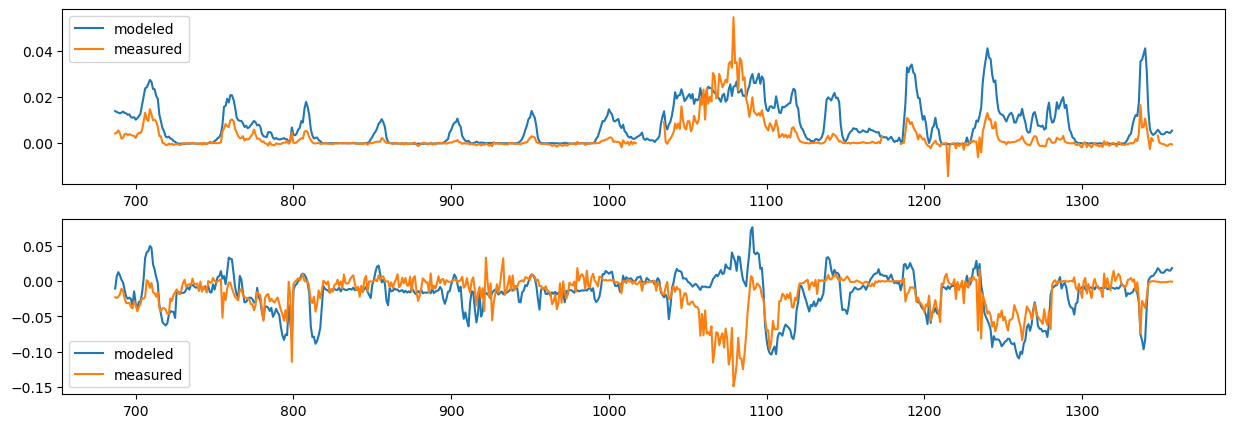

In [100]:
src = variables_df[(variables_df.time > '2022-12-14') & (variables_df.time < '2022-12-28')]
fig, axes = plt.subplots(2,1, figsize=(15,5))
src['E_solution'].plot(ax=axes[0], label='modeled')
src['w_h2o__3m_c'].plot(ax=axes[0], label='measured')
src['H_solution'].plot(ax=axes[1], label='modeled')
src['w_tc__3m_c'].plot(ax=axes[1], label='measured')
axes[0].legend()
axes[1].legend()

## TurbPy

In [101]:
import turbpy
import numpy as np

In [102]:
scheme_dict_1 = {
    'MO (Holtslag/de Bruin)': {
            'stability_method': 'monin_obukhov',
            'monin_obukhov': {
                'gradient_function': 'holtslag_debruin'
            }
        },
    
}
scheme_dict_2 = {
    # 'MO (Webb)': {
    #         'stability_method': 'monin_obukhov',
    #         'monin_obukhov': {
    #             'gradient_function': 'webb'
    #         },
    #         'stability_params': {
    #             'webb': 5.2
    #         }
    # },
    'MO (Webb NoahMP)': {
            'stability_method': 'monin_obukhov',
            'monin_obukhov': {
                'gradient_function': 'webb_noahmp'
            },
            'stability_params': {
                'webb': 5.2
            }
    },
    # 'MO (Marks-Dozier)': {
    #         'stability_method': 'monin_obukhov',
    #         'monin_obukhov': {
    #             'gradient_function': 'marks_dozier'
    #         },
    #         'stability_params': {
    #             'marks_dozier': 5.2
    #         }
    # }
}

In [103]:
SNOW_SURFACE_ROUGHNESS = 1e-4
height = 3
snowDepth = 0
fillna_method='ffill'

# collect inputs
sfcTemp = variables_df['Tsurf_rad_d']
airTemp = variables_df['T_3m_c']
windspd = variables_df['spd_3m_c']
airPressure = (variables_df['P_10m_c'].values * units.millibar).to(units.pascal).magnitude

# the turbpy.vapPress function requires specific humidity in units of g/g
specific_humidity = xr.DataArray(variables_df['specifichumidity_3m_c'])*units('g/kg').to('g/g').magnitude

airVaporPress = turbpy.vapPress(
    specific_humidity,
    airPressure
)

# requires temp in units ˚C
(sfcVaporPress, _) = turbpy.satVapPress(sfcTemp - 273.15)

In [104]:

## Calculate stability
# Initialzie dictionaries for containing output
stability_correction = {}
conductance_sensible = {}
conductance_latent = {}
sensible_heat = {}
latent_heat = {}
zeta = {}

for scheme in [scheme_dict_1, scheme_dict_2]:
    for stab in scheme.keys():
        stability_correction[stab] = np.zeros_like(sfcTemp)
        conductance_sensible[stab] = np.zeros_like(sfcTemp)
        conductance_latent[stab] = np.zeros_like(sfcTemp)
        sensible_heat[stab] = np.zeros_like(sfcTemp)
        latent_heat[stab] = np.zeros_like(sfcTemp)
        zeta[stab] = np.zeros_like(sfcTemp)

    ## Calculate stability
    for stab in scheme.keys():
        for n, (tair, vpair, tsfc, vpsfc, u, airP) in enumerate(zip(
            airTemp, airVaporPress, sfcTemp, sfcVaporPress, windspd, airPressure
        )):
            if any(np.isnan([tair, vpair, tsfc, vpsfc, u, airP])):
                stability_correction[stab][n] = np.nan
                conductance_sensible[stab][n] = np.nan
                conductance_latent[stab][n] = np.nan
                sensible_heat[stab][n] = np.nan
                latent_heat[stab][n] = np.nan
                zeta[stab][n] = np.nan
            else:
                (
                    conductance_sensible[stab][n], 
                    conductance_latent[stab][n], 
                    sensible_heat[stab][n],
                    latent_heat[stab][n],
                    stab_output,
                    p_test
                ) = turbpy.turbFluxes(tair, airP,
                                                        vpair, u, tsfc,
                                                        vpsfc, snowDepth,
                                                        height, param_dict=scheme[stab],
                                                        z0Ground=SNOW_SURFACE_ROUGHNESS, groundSnowFraction=1)
                # Get the Zeta value from the stability parameters dictionary
                if scheme[stab]['stability_method'] != 'monin_obukhov':
                    stability_correction[stab][n] = stab_output['stabilityCorrection']
                    # SHOULD I JUST BE ASSIGNING NAN HERE?
                    zeta[stab][n] = stab_output['zeta']
                else:
                    stability_correction[stab][n] = np.nan
                    zeta[stab][n] = stab_output['zeta']

## Add results

In [110]:
for key in stability_correction.keys():
    variables_df[f'latent_heat_flux {key}'] = -latent_heat[key]/2838
    variables_df[f'sensible_heat_flux {key}'] = -sensible_heat[key]
    # convert from W/m^2 to ˚C*m/s
    variables_df[f'sensible_heat_flux {key}'] = (variables_df[f'sensible_heat_flux {key}']/(variables_df['airdensity_3m_c']*0.718*1000))
    variables_df[f'obukhov_length {key}'] = 3 / zeta[key]

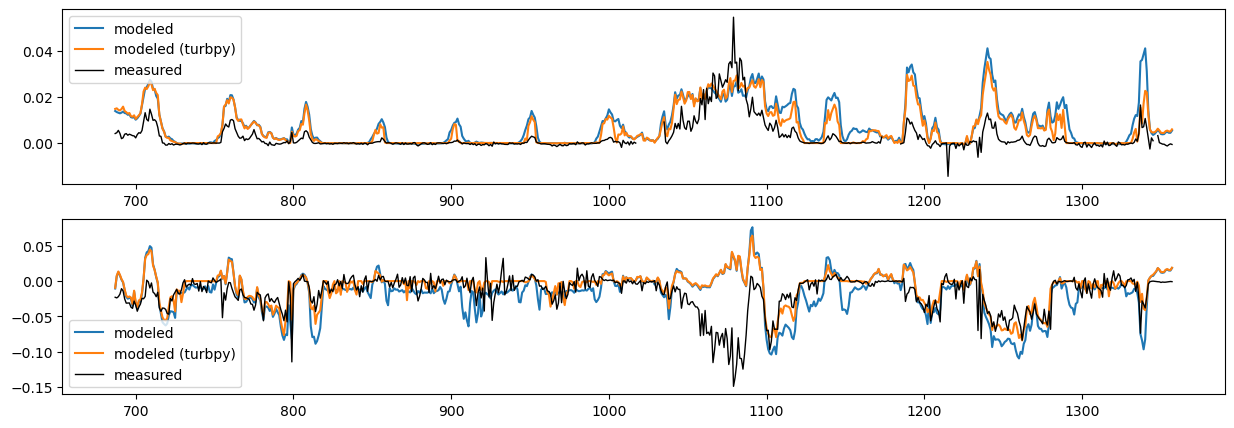

In [132]:
src = variables_df[(variables_df.time > '2022-12-14') & (variables_df.time < '2022-12-28')]
fig, axes = plt.subplots(2,1, figsize=(15,5))
src['E_solution'].plot(ax=axes[0], label='modeled')
src['latent_heat_flux MO (Webb NoahMP)'].plot(ax=axes[0], label='modeled (turbpy)')
src['w_h2o__3m_c'].plot(ax=axes[0], label='measured', color='k', linewidth=1)

src['H_solution'].plot(ax=axes[1], label='modeled')
src['sensible_heat_flux MO (Webb NoahMP)'].plot(ax=axes[1], label='modeled (turbpy)')
src['w_tc__3m_c'].plot(ax=axes[1], label='measured', color='k', linewidth=1)

axes[0].legend()
axes[1].legend()

Add nans for the model results where there are missing timesteps (As compared to the tidy dataset of measurements)

In [157]:
variables_df = pd.merge(
    tidy_df_30Min.query("variable == 'w_h2o__3m_c'")[['time']],
    variables_df,
    on='time',
    how='outer'
)

In [158]:
# OUR SOLUTIONS
tidy_df_30Min = tidy.tidy_df_add_variable(
    tidy_df_30Min,  variables_df['L_solution'], 
    'L predicted',
    'Obukhov length', 
    3,
    'c'
)

tidy_df_30Min = tidy.tidy_df_add_variable(
    tidy_df_30Min, 
    variables_df['u_friction_solution'], 
    'u*_3m_c predicted',
    'shear velocity', 
    3,
    'c'
)

tidy_df_30Min = tidy.tidy_df_add_variable(
    tidy_df_30Min, 
    variables_df['H_solution'], 
    'w_tc__3m_c predicted',
    'w_tc_', 
    3,
    'c'
)

tidy_df_30Min = tidy.tidy_df_add_variable(
    tidy_df_30Min, 
    variables_df['E_solution'], 
    'w_h2o__3m_c predicted',
    'w_h2o_', 
    3,
    'c'
)

# TURBPY SOLUTIONS #1
tidy_df_30Min = tidy.tidy_df_add_variable(
    tidy_df_30Min, 
    variables_df['obukhov_length MO (Holtslag/de Bruin)'], 
    'L predicted (turbpy holtslag de bruin)',
    'Obukhov length', 
    3,
    'c'
)

tidy_df_30Min = tidy.tidy_df_add_variable(
    tidy_df_30Min, 
    variables_df['sensible_heat_flux MO (Holtslag/de Bruin)'], 
    'w_tc__3m_c predicted (turbpy holtslag de bruin)',
    'w_tc_', 
    3,
    'c'
)

tidy_df_30Min = tidy.tidy_df_add_variable(
    tidy_df_30Min, 
    variables_df['latent_heat_flux MO (Holtslag/de Bruin)'], 
    'w_h2o__3m_c predicted (turbpy holtslag de bruin)',
    'w_h2o_', 
    3,
    'c'
)

# TURBPY SOLUTIONS #2
tidy_df_30Min = tidy.tidy_df_add_variable(
    tidy_df_30Min, 
    variables_df['obukhov_length MO (Webb NoahMP)'], 
    'L predicted (turbpy webb noahmp)',
    'Obukhov length', 
    3,
    'c'
)

tidy_df_30Min = tidy.tidy_df_add_variable(
    tidy_df_30Min, 
    variables_df['sensible_heat_flux MO (Webb NoahMP)'], 
    'w_tc__3m_c predicted (turbpy webb noahmp)',
    'w_tc_', 
    3,
    'c'
)

tidy_df_30Min = tidy.tidy_df_add_variable(
    tidy_df_30Min, 
    variables_df['latent_heat_flux MO (Webb NoahMP)'], 
    'w_h2o__3m_c predicted (turbpy webb noahmp)',
    'w_h2o_', 
    3,
    'c'
)

In [180]:
import altair as alt
src = tidy_df_30Min.query("tower == 'c'").query("height == 3")
src = src[src.measurement.isin(['w_h2o_', 'w_tc_', 'Obukhov length'])]
src = src[(src.time > '2023-01-31') & (src.time < '2023-02-08')]
alt.Chart(src).mark_line().encode(
    alt.X("time:T"),
    alt.Y("value:Q"),
    alt.Color("variable:N"),
    alt.Row("measurement:N")
).properties(width=600).resolve_scale(y='independent', color='independent')

alt.Chart(...)

# Save dataset

In [182]:
if PLANAR_FIT:
    tidy_df_30Min.to_parquet(f'tidy_df_30Min_{start_date}_{end_date}_planar_fit.parquet', index=False)
    tidy_df.to_parquet(f'tidy_df_{start_date}_{end_date}_planar_fit.parquet', index=False)
else:
    tidy_df_30Min.to_parquet(f'tidy_df_30Min_{start_date}_{end_date}_noplanar_fit.parquet', index=False)
    tidy_df.to_parquet(f'tidy_df_{start_date}_{end_date}_noplanar_fit.parquet', index=False)

# Create disdrometer dataset with a "days since precip" variable

## Load disdrometer data

In [ ]:
import act

In [ ]:
# files = act.discovery.download_data(
#     os.getenv("ARM_USERNAME"),
#     os.getenv("ARM_TOKEN"),
#     'gucldM1.b1',
#     start_date,
#     end_date,
#     output='/data2/elilouis/sublimationofsnow/gucldM1.b1'
# )

import glob
files = glob.glob('/data2/elilouis/sublimationofsnow/gucldM1.b1/*.cdf')

In [ ]:
disdro_ds = xr.open_mfdataset(files)['precip_rate']

In [ ]:
disdro_ds

In [ ]:
precip_rate_ds = disdro_ds.sel(time=slice("2022-11-30", "2023-04-10")).resample(time='5Min').mean()
precip_rate_ds

In [ ]:
disdro_df = precip_rate_ds.to_dataframe().reset_index()
disdro_df = utils.modify_df_timezone(disdro_df, pytz.UTC, pytz.timezone('US/Mountain'))
disdro_df = disdro_df.set_index('time').loc[slice(start_date, end_date)]
# offset so the timestamp is in the middle, similar to SoS data
disdro_df.index = disdro_df.index + dt.timedelta(minutes=2, seconds=30)

In [ ]:
disdro_df

In [ ]:
disdro_df.to_parquet("precip_rate.parquet")

## Calculate "days since precip"

In [ ]:
disdro_daily_max_precip_date_df = disdro_df.set_index(
    "time"
)[['precip_rate']].resample(
    "1440Min"
).max().reset_index()

disdro_daily_mean_precip_date_df = disdro_df.set_index(
    "time"
)[['precip_rate']].resample(
    "1440Min"
).max().reset_index()

s = disdro_daily_max_precip_date_df.groupby(disdro_daily_max_precip_date_df['precip_rate'].ne(0).cumsum())['time'].transform('first')
disdro_daily_max_precip_date_df['days_since_precip'] = (disdro_daily_max_precip_date_df['time'] - s).dt.days

In [ ]:
daily_mean_precip_df = disdro_df.groupby("time")['precip_rate'].max()

daily_mean_precip_df = pd.DataFrame(daily_mean_precip_df.resample("1440Min").mean()*24/10) # resample to one day in cm/hr SWE

In [ ]:
disdro_daily_max_precip_date_df['daily_precip (cm)'] =  daily_mean_precip_df['precip_rate'].values

## Cache Downloaded Disdrometer data

In [ ]:
disdro_daily_max_precip_date_df.to_csv("disdro_daily_max_precip_date_df.csv")